In [1]:
train_dir = '/Users/Skmal/OneDrive/Documents/archive (7)/train'
test_dir = '/Users/Skmal/OneDrive/Documents/archive (7)/test'

In [2]:
import os
print(len(os.listdir('/Users/Skmal/OneDrive/Documents/archive (7)/train/apples')))
print(len(os.listdir('/Users/Skmal/OneDrive/Documents/archive (7)/train/tomatoes')))
print(len(os.listdir('/Users/Skmal/OneDrive/Documents/archive (7)/test/apples')))
print(len(os.listdir('/Users/Skmal/OneDrive/Documents/archive (7)/test/tomatoes')))

164
130
54
43


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)


Found 236 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


In [4]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

In [5]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [6]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [7]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3


8/8 [==============================] - 71s 8s/step - loss: 5.0666 - accuracy: 0.5508 - val_loss: 0.9138 - val_accuracy: 0.4483
Epoch 2/3
8/8 [==============================] - 53s 7s/step - loss: 2.2161 - accuracy: 0.5466 - val_loss: 2.0626 - val_accuracy: 0.4483
Epoch 3/3
8/8 [==============================] - 53s 7s/step - loss: 1.2652 - accuracy: 0.5805 - val_loss: 1.0756 - val_accuracy: 0.5000


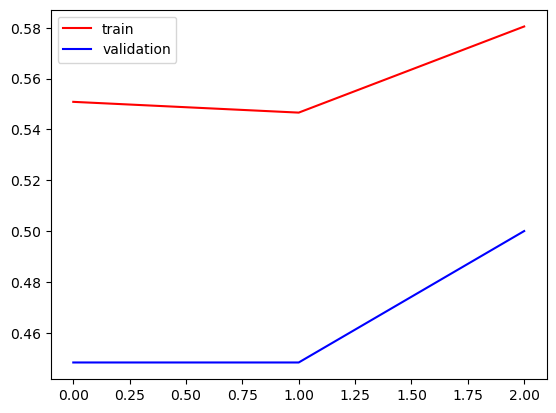

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

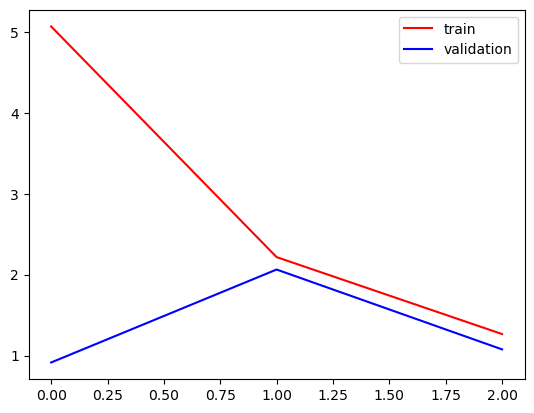

In [9]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 97 images belonging to 2 classes.


In [11]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

4/4 [==============================] - 23s 4s/step
[[0.91855013]
 [0.85221785]
 [0.99572086]
 [0.86355036]
 [0.68266344]
 [0.9338427 ]
 [0.7090579 ]
 [0.930928  ]
 [0.92948365]
 [0.99716234]
 [0.7732174 ]
 [0.6692944 ]
 [0.9549194 ]
 [0.8166569 ]
 [0.9088502 ]
 [0.9972517 ]
 [0.7324094 ]
 [0.25274327]
 [0.77606815]
 [0.93291056]
 [0.5515365 ]
 [0.8146814 ]
 [0.8536009 ]
 [0.9722793 ]
 [0.8469269 ]
 [0.8253595 ]
 [0.79726595]
 [0.6080306 ]
 [0.96187145]
 [0.32628176]
 [0.9977344 ]
 [0.99585646]
 [0.7936639 ]
 [0.83378696]
 [0.94252396]
 [0.82021445]
 [0.58343816]
 [0.991926  ]
 [0.6567078 ]
 [0.7984158 ]
 [0.931092  ]
 [0.86043936]
 [0.9128129 ]
 [0.79591286]
 [0.99003726]
 [0.8668092 ]
 [0.99407405]
 [0.8967167 ]
 [0.9796848 ]
 [0.9610329 ]
 [0.92854303]
 [0.84998786]
 [0.96787447]
 [0.8490335 ]
 [0.55701274]
 [0.998969  ]
 [0.86219025]
 [0.66981506]
 [0.9052873 ]
 [0.9530638 ]
 [0.9695997 ]
 [0.9444682 ]
 [0.7933755 ]
 [0.63866645]
 [0.8066947 ]
 [0.91836935]
 [0.99589735]
 [0.7416394

In [12]:
len(predictions)

97

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 2 52]
 [ 1 42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.04      0.07        54
           1       0.45      0.98      0.61        43

    accuracy                           0.45        97
   macro avg       0.56      0.51      0.34        97
weighted avg       0.57      0.45      0.31        97

